In [3]:
import scipy as sp
import scipy.optimize as optimize
from scipy.optimize import minimize
import pandas as pd
import numpy as np
import sys
import os
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
# The formula
'p = (T_p*S - T_s(0.3*L_s_1 + 0.4*L_s_2 + 0.2*L_s_3 + 0.1*L_s_3)/1.2 - (0.35*L_g_1+0.45*L_g_2+0.2*L_g_3)*T_g/0.95'

'p = (T_p*S - T_s(0.3*L_s_1 + 0.4*L_s_2 + 0.2*L_s_3 + 0.1*L_s_3)/1.2 - (0.35*L_g_1+0.45*L_g_2+0.2*L_g_3)*T_g/0.95'

In [5]:
def injection(x):
    """The injection function"""

    L_g_1 = x[0]
    L_g_2 = x[1]
    L_g_3 = x[2]
    L_g_4 = x[3]
    T_g = x[4]
    T_p = x[5]
    S = x[6]
    T_s = x[7]
    L_s_1 = x[8]
    L_s_2 = x[9]
    L_s_3 = x[10]
    L_s_4 = x[11]
    L_s_5 = x[12]

    return (365*(0.45*L_g_1+0.35*L_g_2+0.15*L_g_3+0.05*L_g_4)*T_g - 
            (T_p*S - 365*T_s*(0.15*L_s_1 + 0.2*L_s_2 + 0.25*L_s_3 + 0.25*L_s_4 + 0.15*L_s_5))/1.2)

In [6]:
# Solar injection with credit is capped at 130% of consumption
def constraint1(x):
    return (1.1*365*(0.45*x[0]+0.35*x[1]+0.15*x[2] + 0.05*x[3])*x[4] - (x[5]*x[6] - 365*x[7]*(0.15*x[8] + 0.2*x[9] + 0.25*x[10] + 0.25*x[11] + 0.15*x[12]))/1.2)
def constraint2(x):
    return (0.45*x[0]+0.35*x[1]+0.15*x[2] + 0.05*x[3])*x[4] - 0
def constraint3(x):
    return x[7]*(0.15*x[8] + 0.2*x[9] + 0.25*x[10] + 0.25*x[11] + 0.15*x[12]) - 0
    
Con1 = {'type':'ineq', 'fun':constraint1}
Con2 = {'type':'ineq', 'fun':constraint2}
Con3 = {'type':'ineq', 'fun':constraint3}
Cons = [Con1, Con2, Con3]

In [7]:
# Factor: kWh/kWp; 12 month; number obtained from Helioscope
B_T_p = (1173,1263)

# Load charged by Grid
# Four Express 100
B_L_g_1 = (0, 65.4) #0.45
B_L_g_2 = (65.4, 165.4) #0.35
B_L_g_3 = (165.4, 230.8) #0.15
B_L_g_4 = (230.8, 338.5) #0.05

# Load charged by solar, bound
B_L_s_1 = (0,65.4) #0.15
B_L_s_2 = (65.4, 165.4) #0.2
B_L_s_3 = (165.4, 230.8) #0.25
B_L_s_4 = (230.8,338.5) #0.25
B_L_s_5 = (338.5, 488.5) #0.15
B_T_g = (2,10)

B_S_500 = (500,500)
B_S_520 = (520,520)
B_S_540 = (540,540)
B_S_560 = (560,560)
B_S_580 = (580,580)
B_S_600 = (600,600)
B_T_s = (0, 6)



# Scenario 1

In [9]:
ig_500_1 = [7.7,65.4,165.4,230.8, 5, 
          1250, 500,
         4, 65.4, 165.4, 230.8, 338.5, 488.5]

Bounds_500 = [B_L_g_1 , B_L_g_2, B_L_g_3, B_L_g_4, B_T_g, 
          B_T_p, B_S_500,
          B_T_s, B_L_s_1, B_L_s_2, B_L_s_3, B_L_s_4, B_L_s_5]
sol_annual_500_1 = minimize(injection, ig_500_1, bounds=Bounds_500, constraints=Cons)
print('Result:', sol_annual_500_1.fun, '\nParameter Values:', sol_annual_500_1.x)

Result: -55630.24358341319 
Parameter Values: [5.48076875e+01 1.46193842e+02 2.16456056e+02 3.06374844e+02
 9.07423073e+00 1.25736151e+03 5.00000000e+02 8.94227237e-01
 3.65192551e+01 1.21329463e+02 2.01614063e+02 2.90930369e+02
 4.22851909e+02]


In [10]:
ig_500_2 = [65.4,165.4,230.8, 338.5, 5, 
          1190, 500,
         4, 7.7, 65.4, 165.4, 230.8, 338.5]
sol_annual_500_2 = minimize(injection, ig_500_2, bounds=Bounds_500, constraints=Cons)
print('Result:', sol_annual_500_2.fun, '\nParameter Values:', sol_annual_500_2.x)

Result: -46847.793887338776 
Parameter Values: [6.53599268e+01 1.65363345e+02 2.30782609e+02 3.38489578e+02
 9.45096989e+00 1.26299987e+03 5.00000000e+02 9.82241600e-03
 7.67587628e+00 6.54022898e+01 1.65402050e+02 2.30802050e+02
 3.38501209e+02]


In [54]:
ig_500_3 = [38.5,100,200,300, 4, 
          1220, 500,
         4, 50, 100, 200, 300, 400]
sol_annual_500_3 = minimize(injection, ig_500_3, bounds=Bounds_500, constraints=Cons)
print('Result:', sol_annual_500_3.fun, '\nParameter Values:', sol_annual_500_3.x)

Result: -51402.3507434926 
Parameter Values: [  64.06974518  151.83992887  223.95997117  325.66609981    9.86587478
 1262.90309683  500.            0.           27.4266784    84.29189269
  184.067178    268.67257853  372.49531259]


In [13]:
Bounds_520 = [B_L_g_1 , B_L_g_2, B_L_g_3, B_L_g_4, B_T_g,
          B_T_p, B_S_520,
          B_T_s, B_L_s_1, B_L_s_2, B_L_s_3, B_L_s_4, B_L_s_5]
ig_520_1 = [7.7,65.4,165.4,230.8, 5, 
          1250, 520,
         4, 65.4, 165.4, 230.8, 338.5, 488.5]
sol_annual_520_1 = minimize(injection, ig_520_1, bounds=Bounds_520, constraints=Cons)
print('Result:', sol_annual_520_1.fun, '\nParameter Values:', sol_annual_520_1.x)

Result: -112733.875 
Parameter Values: [   7.7   65.4  165.4  230.8    5.  1250.   520.     4.    65.4  165.4
  230.8  338.5  488.5]


In [14]:
ig_520_2 = [65.4,165.4,230.8, 338.5, 5, 
          1190, 520,
         4, 7.7, 65.4, 165.4, 230.8, 338.5]
sol_annual_520_2 = minimize(injection, ig_520_2, bounds=Bounds_520, constraints=Cons)
print('Result:', sol_annual_520_2.fun, '\nParameter Values:', sol_annual_520_2.x)

Result: -48064.31652280764 
Parameter Values: [6.53637969e+01 1.65367961e+02 2.30793936e+02 3.38495726e+02
 9.83529578e+00 1.26300000e+03 5.20000000e+02 1.66200960e-02
 7.67707016e+00 6.54014985e+01 1.65401822e+02 2.30801822e+02
 3.38501547e+02]


In [55]:
ig_520_3 = [38.5,100,200,300, 4, 
          1220, 520,
         4, 30.8, 100, 200, 300, 400]
sol_annual_520_3 = minimize(injection, ig_520_3, bounds=Bounds_520, constraints=Cons)
print('Result:', sol_annual_520_3.fun, '\nParameter Values:', sol_annual_520_3.x)

Result: -40442.74999999994 
Parameter Values: [  65.4         165.4         230.8         338.5          10.
 1263.          520.            0.            0.           65.4
  165.4         230.8         351.92329774]


In [17]:
Bounds_540 = [B_L_g_1 , B_L_g_2, B_L_g_3, B_L_g_4, B_T_g,
          B_T_p, B_S_540,
          B_T_s, B_L_s_1, B_L_s_2, B_L_s_3, B_L_s_4, B_L_s_5]
ig_540_1 = [7.7,65.4,165.4,230.8, 5, 
          1250, 540,
         4, 65.4, 165.4, 230.8, 338.5, 488.5]
sol_annual_540_1 = minimize(injection, ig_540_1, bounds=Bounds_540, constraints=Cons)
print('Result:', sol_annual_540_1.fun, '\nParameter Values:', sol_annual_540_1.x)

Result: -158878.3210727953 
Parameter Values: [  30.8135699   112.5155503   196.2135699   281.54344767    5.76924402
 1215.40399527  540.            3.17306698   12.5263807    88.10518034
  200.36933431  251.06556446  390.70524759]


In [18]:
ig_540_2 = [65.4,165.4,230.8, 338.5, 5, 
          1190, 540,
         4, 7.7, 65.4, 165.4, 230.8, 338.5]
sol_annual_540_2 = minimize(injection, ig_540_2, bounds=Bounds_540, constraints=Cons)
print('Result:', sol_annual_540_2.fun, '\nParameter Values:', sol_annual_540_2.x)

Result: -50489.04169385781 
Parameter Values: [  65.39995693  165.3999664   230.7999856   338.4999952     9.93183526
 1230.86931267  540.            0.            7.6853208    65.4
  165.4         230.8         338.5       ]


In [56]:
ig_540_3 = [38.5,100,200,300, 4, 
          1220, 540,
         4, 30.8, 100, 200, 300, 400]
sol_annual_540_3 = minimize(injection, ig_540_3, bounds=Bounds_540, constraints=Cons)
print('Result:', sol_annual_540_3.fun, '\nParameter Values:', sol_annual_540_3.x)

Result: -61715.49420676194 
Parameter Values: [6.53548802e+01 1.65331009e+02 2.30754880e+02 3.38425697e+02
 9.99448076e+00 1.26293791e+03 5.40000000e+02 4.13943265e-03
 1.12614449e+01 7.39951021e+01 1.67530221e+02 2.67318092e+02
 3.80289065e+02]


In [22]:
Bounds_560 = [B_L_g_1 , B_L_g_2, B_L_g_3, B_L_g_4, B_T_g,
          B_T_p, B_S_560,
          B_T_s, B_L_s_1, B_L_s_2, B_L_s_3, B_L_s_4, B_L_s_5]
ig_560_1 = [7.7,65.4,165.4,230.8, 5, 
          1250, 560,
         4, 65.4, 165.4, 230.8, 338.5, 488.5]
sol_annual_560_1 = minimize(injection, ig_560_1, bounds=Bounds_560, constraints=Cons)
print('Result:', sol_annual_560_1.fun, '\nParameter Values:', sol_annual_560_1.x)


Result: -82643.47755514731 
Parameter Values: [6.53750527e+01 1.65361854e+02 2.30775053e+02 3.38458917e+02
 9.99694835e+00 1.26296567e+03 5.60000000e+02 2.28874015e-03
 3.35572798e+01 1.23723775e+02 1.76958266e+02 2.84658266e+02
 4.56657784e+02]


In [23]:
ig_560_2 = [65.4,165.4,230.8, 338.5, 5, 
          1190, 560,
         4, 7.7, 65.4, 165.4, 230.8, 338.5]
sol_annual_560_2 = minimize(injection, ig_560_2, bounds=Bounds_560, constraints=Cons)
print('Result:', sol_annual_560_2.fun, '\nParameter Values:', sol_annual_560_2.x)

Result: -50602.26499421615 
Parameter Values: [  65.02083464  165.1210338   230.67365455  338.42610098   10.
 1192.28077685  560.            0.            7.37888122   65.40069698
  165.40087074  230.80087074  338.50052265]


In [57]:
ig_560_3 = [38.5,100,200,300, 4, 
          1220, 560,
         4, 30.8, 100, 200, 300, 400]
sol_annual_560_3 = minimize(injection, ig_560_3, bounds=Bounds_560, constraints=Cons)
print('Result:', sol_annual_560_3.fun, '\nParameter Values:', sol_annual_560_3.x)

Result: -40542.74999999994 
Parameter Values: [  65.4  165.4  230.8  338.5   10.  1173.   560.     0.     0.    65.4
  165.4  230.8  338.5]


In [26]:
Bounds_580 = [B_L_g_1 , B_L_g_2, B_L_g_3, B_L_g_4, B_T_g,
          B_T_p, B_S_580,
          B_T_s, B_L_s_1, B_L_s_2, B_L_s_3, B_L_s_4, B_L_s_5]
ig_580_1 = [7.7,65.4,165.4,230.8, 5, 
          1250, 580,
         4, 65.4, 165.4, 230.8, 338.5, 488.5]
sol_annual_580_1 = minimize(injection, ig_580_1, bounds=Bounds_580, constraints=Cons)
print('Result:', sol_annual_580_1.fun, '\nParameter Values:', sol_annual_580_1.x)

Result: -158572.20010276805 
Parameter Values: [  13.47         71.78688651  168.13743239  231.71260767    5.5
 1250.00042201  580.            3.93135065   65.39984066  165.39978754
  230.79973442  338.49973442  488.49984065]


In [27]:
ig_580_2 = [65.4,165.4,230.8, 338.5, 5, 
          1190, 580,
         4, 7.7, 65.4, 165.4, 230.8, 338.5]
sol_annual_580_2 = minimize(injection, ig_580_2, bounds=Bounds_580, constraints=Cons)
print('Result:', sol_annual_580_2.fun, '\nParameter Values:', sol_annual_580_2.x)

Result: -68304.02469171933 
Parameter Values: [6.53145219e+01 1.65269300e+02 2.30714522e+02 3.38380287e+02
 9.66129066e+00 1.20981179e+03 5.80000000e+02 5.29415801e-01
 7.96841507e+00 7.03363703e+01 1.68864790e+02 2.36185095e+02
 3.45607075e+02]


In [58]:
ig_580_3 = [38.5,100,200,300, 4, 
          1220, 580,
         4, 30.8, 100, 200, 300, 400]
sol_annual_580_3 = minimize(injection, ig_580_3, bounds=Bounds_580, constraints=Cons)
print('Result:', sol_annual_580_3.fun, '\nParameter Values:', sol_annual_580_3.x)

Result: -83191.6889781187 
Parameter Values: [6.53823931e+01 1.65373078e+02 2.30782393e+02 3.38471005e+02
 9.99784625e+00 1.22061588e+03 5.80000000e+02 1.61531435e-03
 3.05285862e+01 9.96749425e+01 1.99622305e+02 2.99455054e+02
 3.99592859e+02]


In [47]:
Bounds_600 = [B_L_g_1 , B_L_g_2, B_L_g_3, B_L_g_4, B_T_g,
          B_T_p, B_S_600,
          B_T_s, B_L_s_1, B_L_s_2, B_L_s_3, B_L_s_4, B_L_s_5]

ig_600_1 = [7.7,65.4,165.4,230.8, 5, 
          1250, 600,
         4, 65.4, 165.4, 230.8, 338.5, 488.5]

sol_annual_600_1 = minimize(injection, ig_600_1, bounds=Bounds_600, constraints=Cons)
print('Result:', sol_annual_600_1.fun, '\nParameter Values:', sol_annual_600_1.x)

Result: -124926.70387746196 
Parameter Values: [6.53010100e+01 1.65248639e+02 2.30701010e+02 3.03012601e+02
 9.98789113e+00 1.25000999e+03 6.00000000e+02 9.08164905e-03
 6.51558498e+01 1.65029363e+02 2.30546713e+02 3.38097663e+02
 4.87957750e+02]


In [48]:
ig_600_2 = [65.4,165.4,230.8, 338.5, 5, 
          1190, 600,
         4, 7.7, 65.4, 165.4, 230.8, 338.5]
sol_annual_600_2 = minimize(injection, ig_600_2, bounds=Bounds_600, constraints=Cons)
print('Result:', sol_annual_600_2.fun, '\nParameter Values:', sol_annual_600_2.x)

Result: -73674.08913934854 
Parameter Values: [6.53273355e+01 1.65291571e+02 2.30732960e+02 3.38406418e+02
 9.77140082e+00 1.19008276e+03 6.00000000e+02 5.28830322e-01
 7.81839407e+00 6.54629136e+01 1.65454001e+02 2.30871488e+02
 3.38578193e+02]


In [59]:
ig_600_3 = [38.5,100,200,300, 4, 
          1220, 600,
         4, 38.5, 100, 200, 300, 400]
sol_annual_600_3 = minimize(injection, ig_600_3, bounds=Bounds_600, constraints=Cons)
print('Result:', sol_annual_600_3.fun, '\nParameter Values:', sol_annual_600_3.x)

Result: -125201.80720276869 
Parameter Values: [6.52769869e+01 1.65253428e+02 2.30676987e+02 3.38297423e+02
 9.98827426e+00 1.26283072e+03 6.00000000e+02 8.79430225e-03
 1.23013121e-01 6.55880935e+01 1.65523013e+02 2.30938830e+02
 3.57387871e+02]


In [60]:
a = {'Nameplate':[500,520,540,560,580,600], 
    'Net Injection-1':[sol_annual_500_1.fun, sol_annual_520_1.fun, sol_annual_540_1.fun, sol_annual_560_1.fun,
                     sol_annual_580_1.fun, sol_annual_600_1.fun],
    'Net Injection-2':[sol_annual_500_2.fun, sol_annual_520_2.fun, sol_annual_540_2.fun, sol_annual_560_2.fun,
                     sol_annual_580_2.fun, sol_annual_600_2.fun],
    'Net Injection-3':[sol_annual_500_3.fun, sol_annual_520_3.fun, sol_annual_540_3.fun, sol_annual_560_3.fun,
                     sol_annual_580_3.fun, sol_annual_600_3.fun]}
data = pd.DataFrame(a)
data

,Nameplate,Net Injection-1,Net Injection-2,Net Injection-3
0,500,-55630.243583,-46847.793887,-51402.350743
1,520,-112733.875000,-48064.316523,-40442.750000
2,540,-158878.321073,-50489.041694,-61715.494207
3,560,-82643.477555,-50602.264994,-40542.750000
4,580,-158572.200103,-68304.024692,-83191.688978
5,600,-124926.703877,-73674.089139,-125201.807203


In [61]:
data['Net Injection-1'] = abs(data['Net Injection-1'])
data['Net Injection-2'] = abs(data['Net Injection-2'])
data['Net Injection-3'] = abs(data['Net Injection-3'])
data

,Nameplate,Net Injection-1,Net Injection-2,Net Injection-3
0,500,55630.243583,46847.793887,51402.350743
1,520,112733.875000,48064.316523,40442.750000
2,540,158878.321073,50489.041694,61715.494207
3,560,82643.477555,50602.264994,40542.750000
4,580,158572.200103,68304.024692,83191.688978
5,600,124926.703877,73674.089139,125201.807203


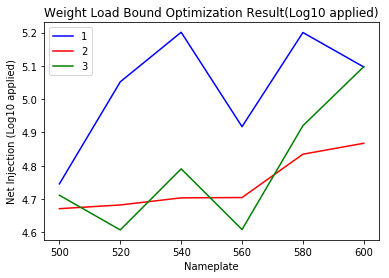

In [62]:
pl.plot(data['Nameplate'], np.log10(data['Net Injection-1']), '-', c='b',label='1')
pl.plot(data['Nameplate'], np.log10(data['Net Injection-2']), '-', c='r', label='2')
pl.plot(data['Nameplate'], np.log10(data['Net Injection-3']), '-', c='g', label='3')
pl.xlabel('Nameplate')
pl.ylabel('Net Injection (Log10 applied)')
pl.title('Weight Load Bound Optimization Result(Log10 applied)')
pl.legend()